In [1]:
# Basic modules
import pandas as pd
import itertools
import numpy as np
from colorama import Fore, Back, Style

# Sklearn tools
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import classifiers
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Function to visualise confusion matrix
def make_confusion_matrix(cnf_matrix, clf, model_name):

    fig = plt.figure()
    # Normalise matrix
    cnf_matrix = np.asarray(cnf_matrix)
    cnf_matrix = [[float(a) / sum(row) for a in row] for row in cnf_matrix]

    cnf_matrix = np.asarray(cnf_matrix)
    im = plt.imshow(cnf_matrix, interpolation='nearest', cmap='Blues')

    # For manipulation of colorbar
    cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    cb.ax.set_yticklabels(cb.ax.get_yticklabels())

    # Tick manipulation
    tick_marks = np.arange(len(clf.classes_))
    plt.xticks(tick_marks, clf.classes_, rotation=45, fontsize=8)
    plt.yticks(tick_marks, clf.classes_, fontsize=8)
    
    # Adding the text value of each cell
    fmt = '.2f'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), 
                                  range(cnf_matrix.shape[1])):
        plt.text(j, i, (format(cnf_matrix[i, j], fmt)),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh 
                 else "black", fontsize=13)

    # Labels
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)
    
    # Title
    plt.title('{} model'.format(model_name))

In [3]:
# Load dataset
iris = datasets.load_iris()

In [4]:
# Print the label species(setosa, versicolor,virginica)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# Print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Print the iris data (top 5 records)
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# Print the iris labels (0:setosa, 1:versicolor, 2:virginica)
label_dict = {0:'setosa', 1:'versicolor', 2:'virginica'}
print(iris.target[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# Creating a DataFrame of given iris dataset.
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=[label_dict[c] for c in data['species'].tolist()]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [10]:
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predict on the test set, for both classes and probabilities
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)

In [11]:
# Show the comparison of true to predicted labels
N = 1
for y_t, y_p, y_pp in zip(y_test, y_pred, y_pred_proba):
    y_pp_dict = dict(zip(clf.classes_, y_pp))
    print('Datum {}, true label: {}\n'.format(N, y_t))
    for c, v in y_pp_dict.items():
        if y_p != y_t:
            print(Fore.RED + '{:.2f}: {}'.format(v, c) + Style.RESET_ALL)
        else:
            print('{:.2f}: {}'.format(v, c))
    print('\n************')
    N += 1

Datum 1, true label: versicolor

0.00: setosa
1.00: versicolor
0.00: virginica

************
Datum 2, true label: versicolor

0.00: setosa
0.99: versicolor
0.00: virginica

************
Datum 3, true label: virginica

0.00: setosa
0.00: versicolor
1.00: virginica

************
Datum 4, true label: virginica

0.00: setosa
0.01: versicolor
0.99: virginica

************
Datum 5, true label: virginica

0.00: setosa
0.08: versicolor
0.92: virginica

************
Datum 6, true label: setosa

1.00: setosa
0.00: versicolor
0.00: virginica

************
Datum 7, true label: setosa

1.00: setosa
0.00: versicolor
0.00: virginica

************
Datum 8, true label: virginica

0.00: setosa
0.04: versicolor
0.96: virginica

************
Datum 9, true label: virginica

0.00: setosa
0.24: versicolor
0.76: virginica

************
Datum 10, true label: virginica

0.00: setosa
0.00: versicolor
1.00: virginica

************
Datum 11, true label: virginica

0.00: setosa
0.06: versicolor
0.94: virginica

***

In [12]:
# Model evaluation
# get precision, recall, fscore and support
prec1, rec1, f_score1, sup1 = metrics.precision_recall_fscore_support(y_test, y_pred,
                                                          average='macro')
acc1 = metrics.accuracy_score(y_test, y_pred)

# Print values
print("Accuracy: {:.2f}".format(acc1))
print("Precision: {:.2f}".format(prec1))
print("Recall: {:.2f}".format(rec1))
print("F1 score: {:.2f}".format(f_score1))

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 score: 0.98


In [13]:
# Predict new entry
new_pred = clf.predict([[3, 5, 4, 2], [3, 5, 4, 2]])
print(new_pred)
# print('\nOur new datum is predicted as {}\n'.format(new_pred))

['versicolor' 'versicolor']


In [14]:
feature_imp = pd.Series(clf.feature_importances_, 
                        index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.444668
petal width (cm)     0.414112
sepal length (cm)    0.110633
sepal width (cm)     0.030588
dtype: float64

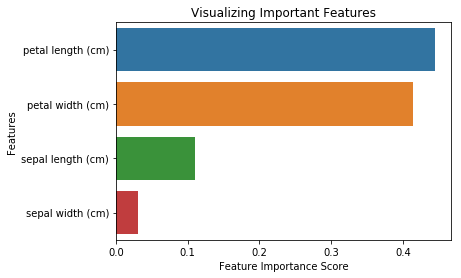

In [15]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 15]])

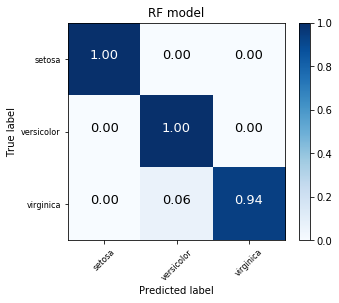

In [17]:
make_confusion_matrix(cnf_matrix, clf, 'RF')

In [18]:
# Just to show how easy it is to switch classifiers...
# And because everyone loves Neural Networks...
# Let's use a neural network
clf2 = MLPClassifier(max_iter=20000)
clf2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
y_pred2=clf2.predict(X_test)
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
print(cnf_matrix2)

[[13  0  0]
 [ 0 16  0]
 [ 0  0 16]]


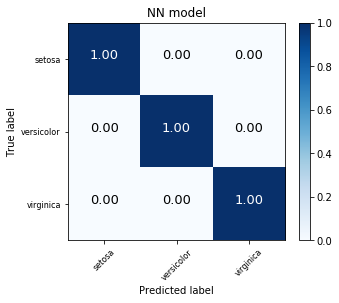

In [20]:
make_confusion_matrix(cnf_matrix2, clf2, 'NN')

In [21]:
# Model evaluation
# get precision, recall, fscore and support
prec2, rec2, f_score2, sup2 = metrics.precision_recall_fscore_support(y_test, y_pred2,
                                                          average='macro')
acc2 = metrics.accuracy_score(y_test, y_pred2)

# Print values
print("Accuracy: {:.2f}".format(acc2))
print("Precision: {:.2f}".format(prec2))
print("Recall: {:.2f}".format(rec2))
print("F1 score: {:.2f}".format(f_score2))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


F1   Model
---- -------------
0.98 Random Forest
0.98 Extra Trees
1.00 Neural network
0.98 Naive Bayes
0.98 Decision tree


And the winner is / winners are:

    Neural network

...with an F1 score of 1.00




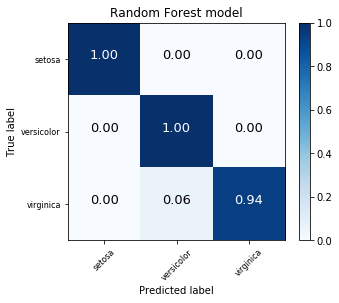

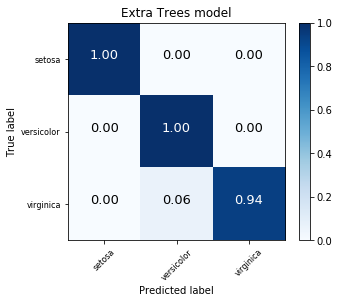

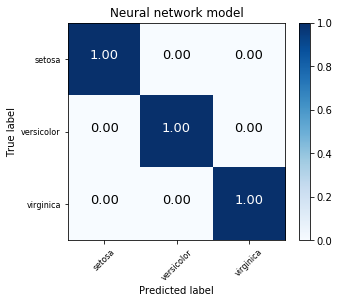

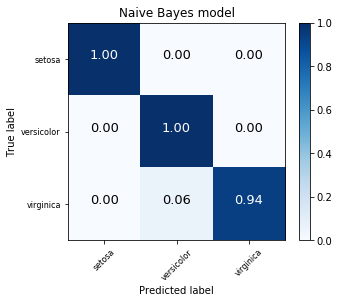

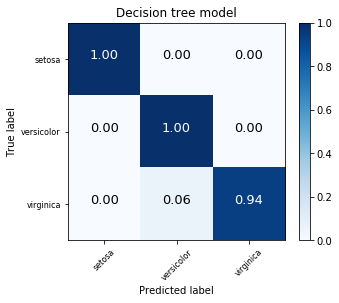

In [22]:
# Let's find the best classifier from a bunch of different ones based on the F1 score

# Build dictionary of classifiers
clf_dict = {'Random Forest': RandomForestClassifier(n_estimators=100), 
            'Extra Trees': ExtraTreesClassifier(n_estimators=500),
            'Neural network': MLPClassifier(max_iter=20000),
            'Naive Bayes': GaussianNB(), 
            'Decision tree': tree.DecisionTreeClassifier()}

f1_dict = dict()
max_f1 = -1
print('F1   Model\n---- -------------')
for clf_name, model in clf_dict.items():

    # Train the model using the training sets
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Get f1 score
    prec, rec, f_score, sup = metrics.precision_recall_fscore_support(y_test, y_pred,
                                                                      average='macro')
    # Round to 2 d.p.
    f_score = float('{:.2f}'.format(f_score))
    
    # Append to dictionary
    f1_dict[clf_name] = f_score
    
    # Overwrite with max. value
    if f_score > max_f1:
        max_f1 = f_score
    print('{:.2f} {}'.format(f_score, clf_name))
    
    # Make confusion matrix and plot
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    make_confusion_matrix(cnf_matrix, model, clf_name)

# Outputting string in a nice way
best_models = ''
for clf_name, f in f1_dict.items():
    if f == max_f1:
        best_models += '    {}\n'.format(clf_name)
    
print('\n\nAnd the winner is / winners are:\n\n{}\n...with an F1 score of {:.2f}\n\n'.format(best_models, max_f1))
